<a href="https://colab.research.google.com/github/shivanitikhe27/Playstore-Analysis-using-python/blob/main/Webscraping_laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
link='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [ ]:
page = requests.get(link)

In [ ]:
page

<Response [200]>

In [ ]:
soup = bs(page.content,'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.5a191e.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

# Finding all the configurations

In [ ]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
cpu = []                 #List to store CPU specifications of the product
ram = []                 #List to store RAM specifications of the product
os = []                  #List to store OS specifications of the product
hd = []                  #List to store HDD specifications of the product
display = []             #List to store Display specifications of the product


In [ ]:
for containers in soup.findAll('a',class_='_1fQZEK'):
        name=containers.find('div', attrs={'class':'_4rR01T'})
        price=containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div', attrs={'class':'_3LWZlK'})
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        ## Splitting integrated specification into individual CPU, RAM, OS, HDD and Display specifications
        for col in specification:
            col=col.find_all('li', attrs={'class':'rgWa7D'})
            cput =col[0].text
            ramt = col[1].text
            ost = col[2].text
            hdt = col[3].text
            displayt = col[4].text
        
        products.append(name.text) # Add product name to list
        
        prices.append(price.text) # Add price to list
        
        #specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
        
        cpu.append(cput) # Add CPU specifications to list
        
        ram.append(ramt) # Add RAM specifications to list
        
        os.append(ost) # Add OS specifications to list
        
        hd.append(hdt) # Add HDD specifications to list
        
        display.append(displayt) # Add Display specifications to list
        
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count=count+1 # Increment row count

In [ ]:
print(len(products))
print(len(ratings))
print(len(price))
print(len(cpu))
len(ram)
len(os)
len(hd)
len(display)

24
24
1
24


24

In [ ]:
import pandas as pd

In [ ]:


df=pd.DataFrame({'Product Name':products,'CPU':cpu,'RAM':ram,'OS':os,"HD Capacity":hd,'Display':display,'Price':prices,'Rating':ratings,})

In [ ]:
df

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Vaio E Series Ryzen 5 Quad Core 3500U - (8 GB/...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹46,990",4.3
1,Vaio SE Series Core i5 8th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹62,990",3.5
2,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹47,990",4.3
3,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.2
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹54,990",4.5
5,HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹31,490",4
6,lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,"₹59,990",4.6
7,lenovo Ideapad S145 Core i3 10th Gen - (4 GB/2...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹33,490",4.2
8,lenovo Ideapad S145 APU Dual Core A6 A6-9225 -...,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹24,990",4
9,DELL Inspiron Ryzen 3 Dual Core 3250U - (4 GB/...,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,"₹36,790",4.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  24 non-null     object
 1   CPU           24 non-null     object
 2   RAM           24 non-null     object
 3   OS            24 non-null     object
 4   HD Capacity   24 non-null     object
 5   Display       24 non-null     object
 6   Price         24 non-null     object
 7   Rating        24 non-null     object
dtypes: object(8)
memory usage: 1.6+ KB


In [ ]:
print(df.shape)

(24, 8)


In [ ]:
df.isnull()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() # Check for null values

Product Name    0
CPU             0
RAM             0
OS              0
HD Capacity     0
Display         0
Price           0
Rating          0
dtype: int64

In [ ]:
# Format Price column to remove ₹ and delimiter ',' used for the thousandth place 
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',' : ''}, regex=True)
df.head() # Check if formatting is correct

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Vaio E Series Ryzen 5 Quad Core 3500U - (8 GB/...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,46990,4.3
1,Vaio SE Series Core i5 8th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,62990,3.5
2,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,47990,4.3
3,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,36990,4.2
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,54990,4.5


In [ ]:
df.dtypes

Product Name    object
CPU             object
RAM             object
OS              object
HD Capacity     object
Display         object
Price           object
Rating          object
dtype: object

In [ ]:
# works as as below code
#df['Price']=df['Price'].astype(float)
#df['Rating']=df['Rating'].astype(float)

In [ ]:
# Convert numeric columns in string format to float for mathematical and graphic operations

df.iloc[:,6]= df.iloc[:,6].astype(float)
df.iloc[:,7]= df.iloc[:,7].astype(float)

In [ ]:
df.dtypes

Product Name     object
CPU              object
RAM              object
OS               object
HD Capacity      object
Display          object
Price           float64
Rating          float64
dtype: object

In [ ]:
# Save cleaned and processed data to a CSV file
df.to_csv('WebScrapingLaptops.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'WebScrapingLaptops.csv'

In [ ]:
df1=pd.read_csv('WebScrapingLaptops.csv')

In [ ]:
df1.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Vaio E Series Ryzen 5 Quad Core 3500U - (8 GB/...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,46990.0,4.3
1,Vaio SE Series Core i5 8th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,62990.0,3.5
2,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,47990.0,4.3
3,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,36990.0,4.2
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,54990.0,4.5


# Univariate Analysis Plot Histograms and BoxPlots

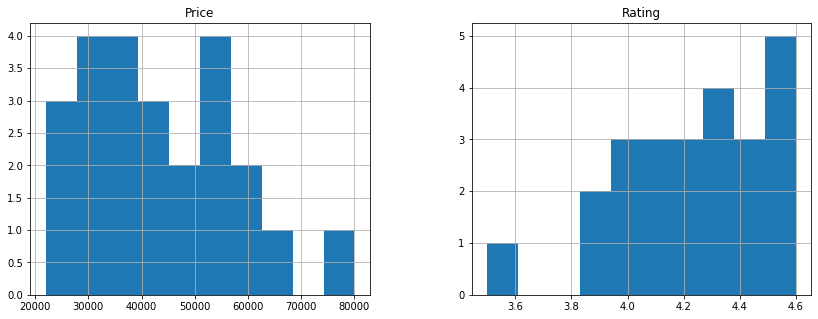

In [ ]:
# Plot Histograms of Price and Rating
import seaborn as sns
import matplotlib.pyplot as plt

df1.hist(figsize=(14,5))
plt.show()

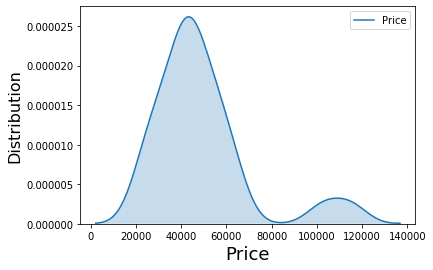

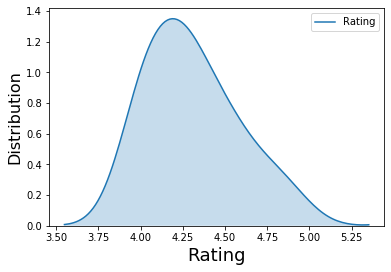

In [ ]:
# Plot Distibution Plots of Price and Rating
columns=['Price','Rating']
for i in columns:
    sns.kdeplot(df1[i],shade=True)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Distribution', fontsize=16)
    plt.show()

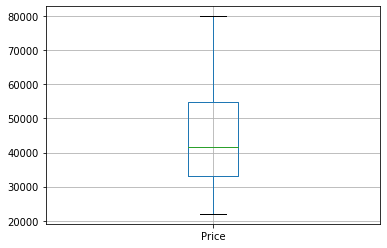

In [ ]:
# Boxplot of Price  using Dataframe method
df1.boxplot(column='Price',grid=True,figsize=(6,4))
plt.show()

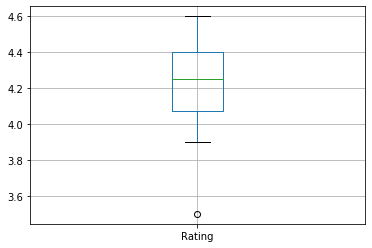

In [ ]:
# Box plot of Rating

df1.boxplot(column='Rating',grid=True,figsize=(6,4))
plt.show()

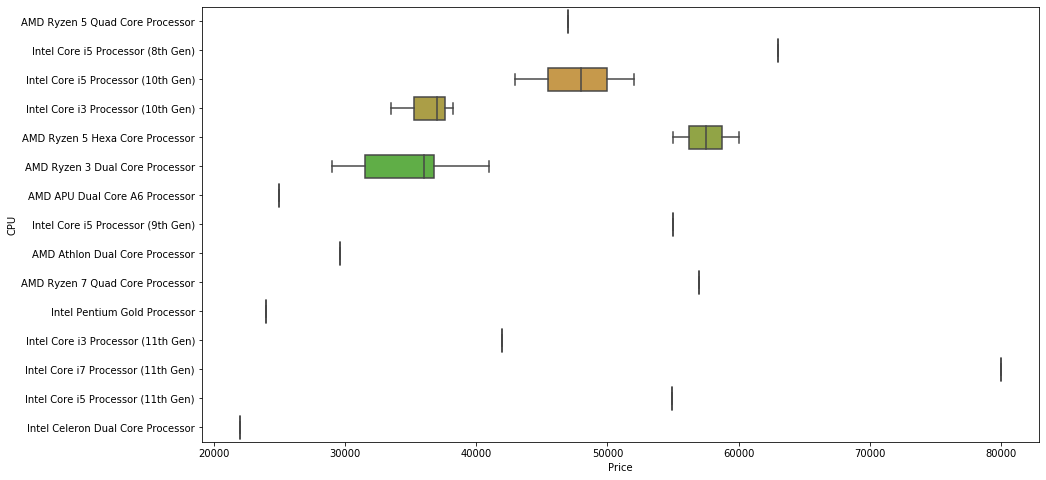

In [ ]:
# Bivariate Analysis
# Box plot of CPU and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="CPU",x='Price',data=df1)
plt.show()

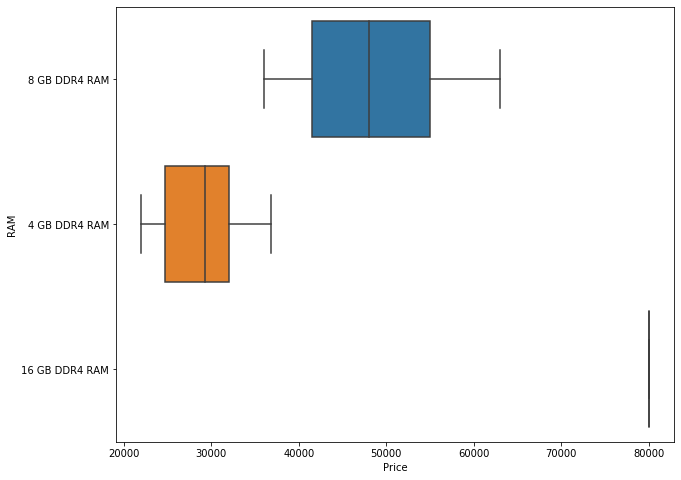

In [ ]:
# Box plot of RAM and Price
plt.figure(figsize=(10,8))
sns.boxplot(y="RAM",x='Price',data=df1)
plt.show()

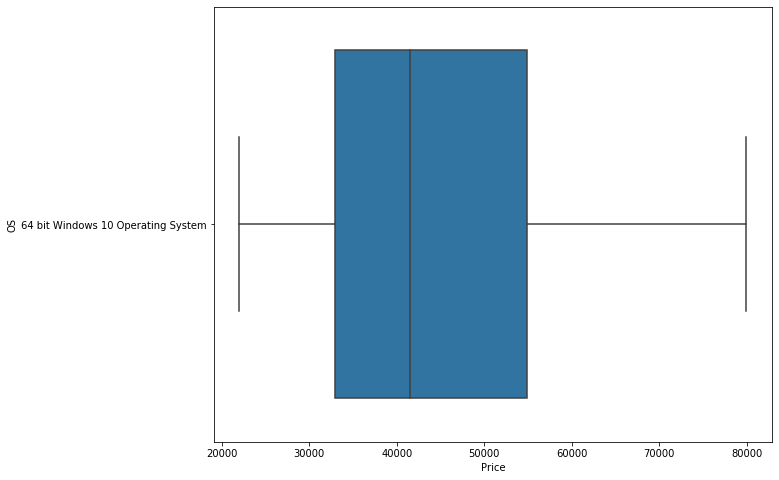

In [ ]:
# Box plot of OS and Price
plt.figure(figsize=(10,8))
sns.boxplot(y="OS",x='Price',data=df1)
plt.show()

# Bar Graphs using Matplotlib

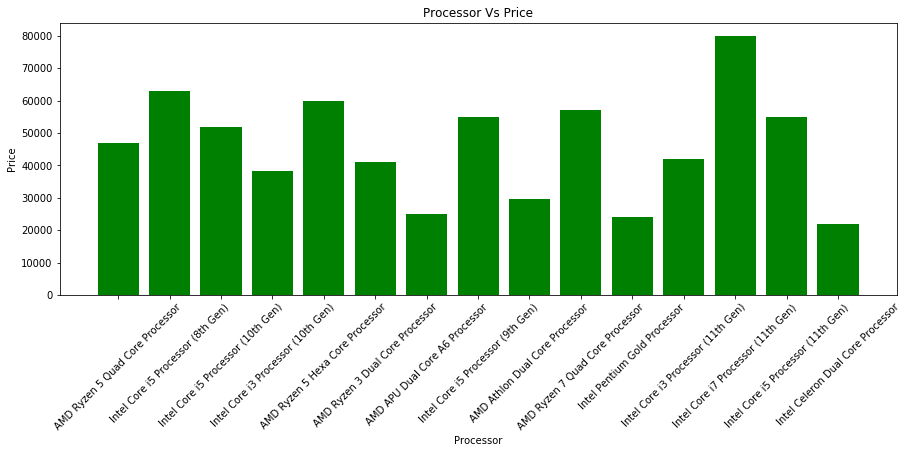

In [ ]:
# Bar Graph - Processor Vs Price
# Using plt
plt.figure(figsize=(15,5))
plt.bar(df1['CPU'],df1['Price'],color='green')
plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()

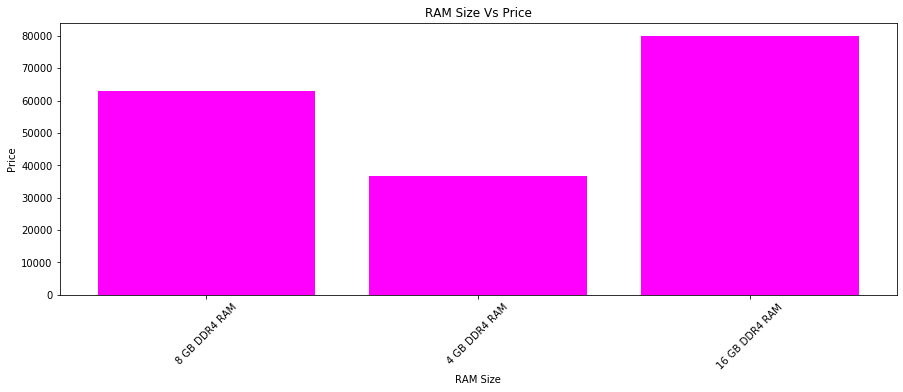

In [ ]:
# Bar Graph - RAM Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['RAM'],df1['Price'],color='fuchsia')
plt.xticks(rotation=45)
plt.xlabel('RAM Size')
plt.ylabel('Price')
plt.title('RAM Size Vs Price')
plt.show()

In [ ]:
# Findings from fig.

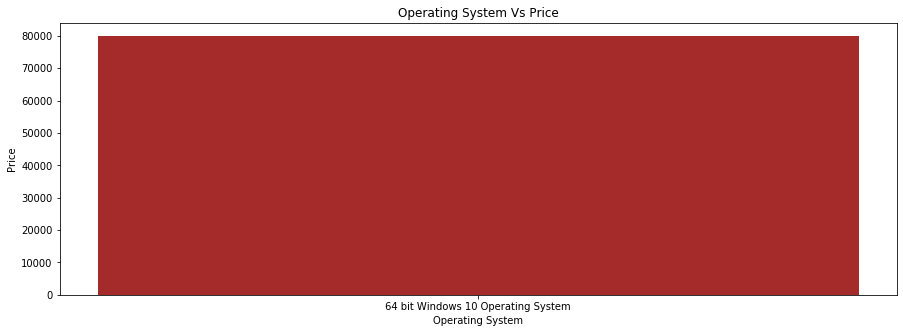

In [ ]:
# Bar Graph - OS Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['OS'],df1['Price'],color='brown')
plt.xticks(rotation=0)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Operating System Vs Price')
plt.show()

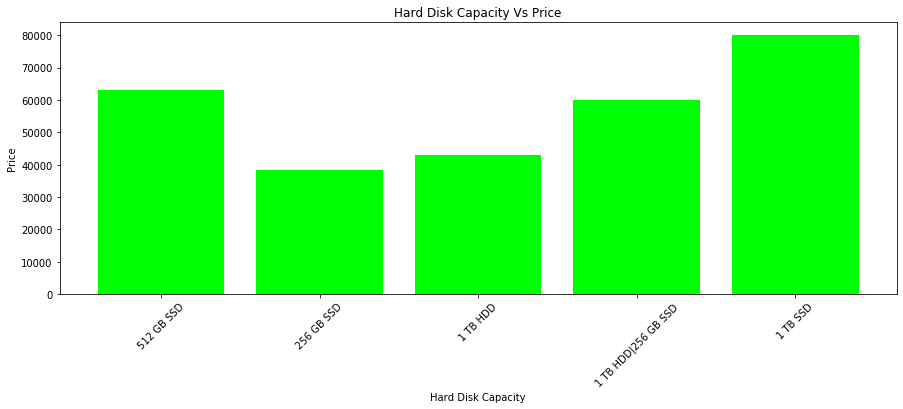

In [ ]:
# Bar Graph - HDD Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['HD Capacity'],df1['Price'],color='lime')
plt.xticks(rotation=45)
plt.xlabel('Hard Disk Capacity')
plt.ylabel('Price')
plt.title('Hard Disk Capacity Vs Price')
plt.show()

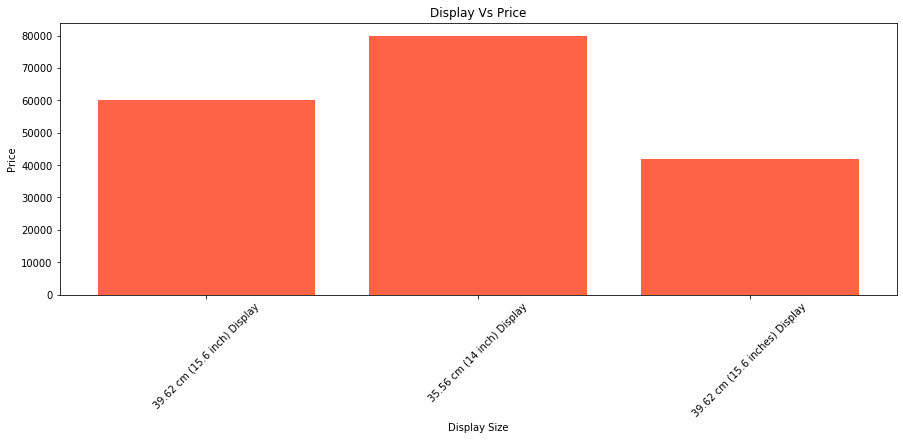

In [ ]:
# Bar Graph - Display Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['Display'],df1['Price'],color='tomato')
plt.xticks(rotation=45)
plt.xlabel('Display Size')
plt.ylabel('Price')
plt.title('Display Vs Price')
plt.show()

# BarPlots using Seaborn library

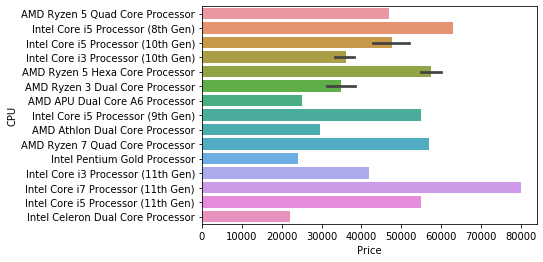

In [ ]:
# Bar Plot - Price Vs CPU
#
sns.barplot(x=df1.Price, y=df1.CPU)

#sns.barplot(y=df1.Price, x=df1.CPU)
#plt.xticks(rotation=90)

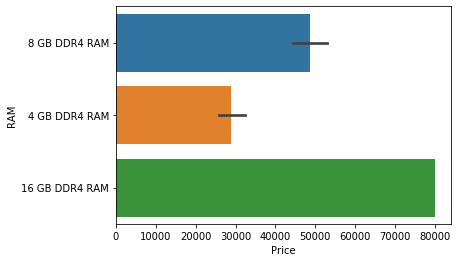

In [ ]:
# Bar Plot - Price Vs RAM
sns.barplot(x=df1.Price, y=df1.RAM)

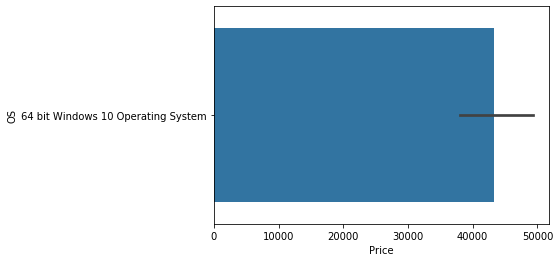

In [ ]:
# Bar Plot - Price Vs OS
sns.barplot(x=df1['Price'], y=df1['OS'])

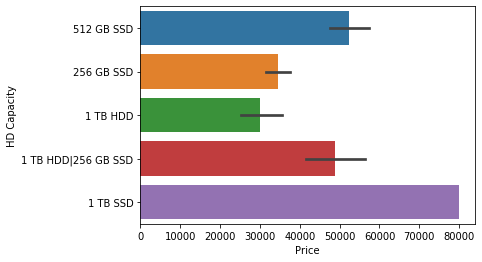

In [ ]:
# Bar Plot - Price Vs HDD
sns.barplot(x=df1['Price'], y=df1['HD Capacity'])

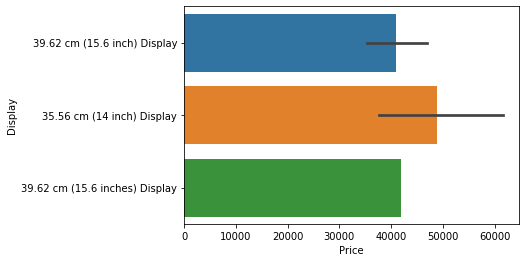

In [ ]:
# Bar Plot - Price Vs Display
sns.barplot(x=df1['Price'], y=df1['Display'])

# BarPlots using Seaborn library
Categorical Variables versus Price

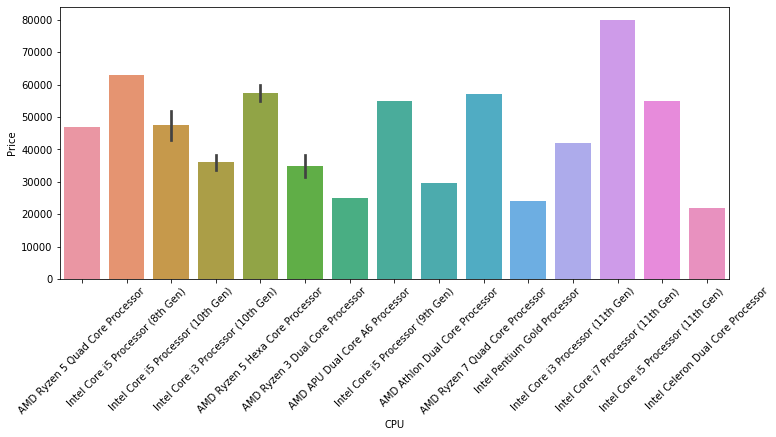

In [ ]:
# Bar Plot - CPU Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['CPU'], y=df1['Price'])
plt.xticks(rotation=45);

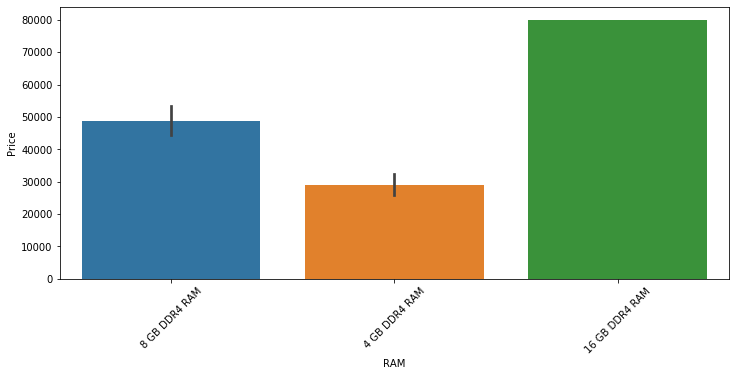

In [ ]:
# Bar Plot - RAM Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['RAM'], y=df1['Price'])
plt.xticks(rotation=45)
plt.show();

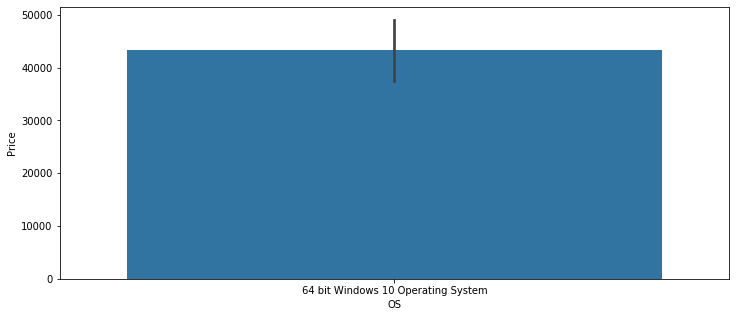

In [ ]:
# Bar Plot - OS Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['OS'], y=df1['Price'])
plt.xticks(rotation=0);

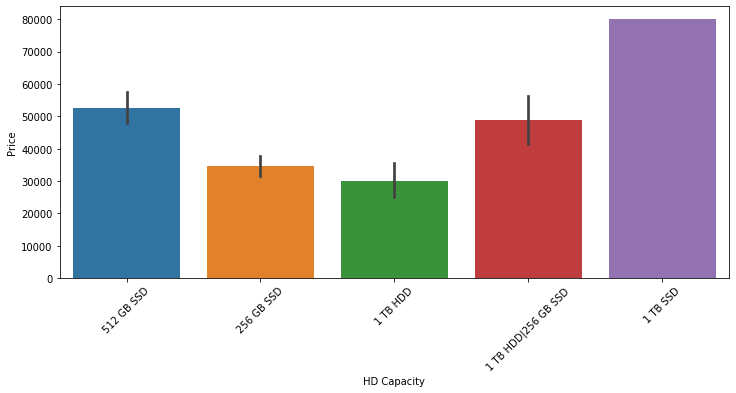

In [ ]:
# Bar Plot - HDD Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['HD Capacity'], y=df1['Price'])
plt.xticks(rotation=45);

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

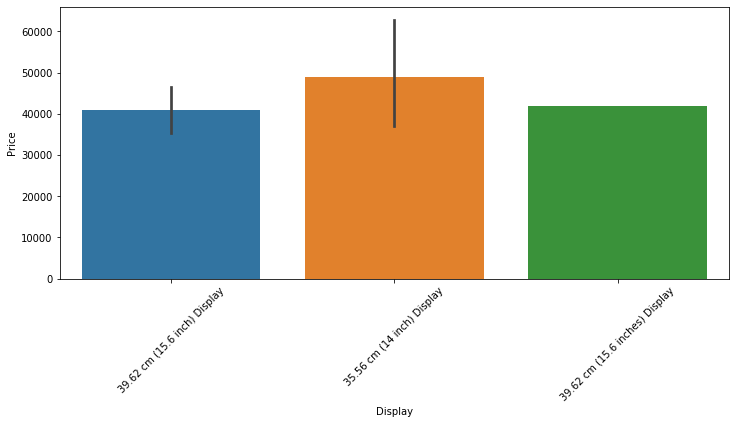

In [ ]:
# Bar Plot - Display Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['Display'], y=df1['Price'])
plt.xticks(rotation=45)

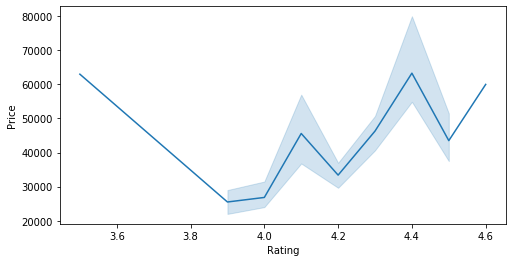

In [ ]:
# Line Plot - Rating Vs Price between categorical variables
plt.figure(figsize=(8,4))
sns.lineplot(x=df1['Rating'], y=df1['Price'])

### You learned how to:
* Inspect the HTML structure of your target site with your browser’s tools
* Gain insight into how to decipher the data encoded in URLs
* Download the page’s HTML content using Python’s requests library
* Parse the downloaded HTML with Beautiful Soup to extract relevant information